In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

%config InlineBackend.figure_format='retina'

In [2]:
def count_k_arm(k = 10, timesteps = 1000, runs = 2000, epsilon = 0.01, alpha = 0.1, opt = 0):
    
    q_star = np.random.normal(0, 1, (runs, k))
    q_optimal = np.argmax(q_star, axis=1)
    
    Q = np.zeros((runs, k))
    Q += opt
    R = []
    optimal_total = []
    N = np.ones((runs, k))
    
    for timestep in tqdm(range(timesteps)):
        R_t = []
        optimal_t = 0
        for problem in range(runs):
            q_star[problem] += np.random.normal(0, 0.01, k)
            q_optimal[problem] = np.argmax(q_star[problem])
            
            if Q[problem].sum() == 0 or np.random.random(1) < epsilon:
                A_t = np.random.randint(k)
                
            else:
                A_t = np.argmax(Q[problem])
                
            if A_t == q_optimal[problem]: optimal_t += 1
                
            R_current = np.random.normal(q_star[problem, A_t], 1)
            R_t.append(R_current)
            N[problem, A_t] += 1
            Q[problem, A_t] = Q[problem, A_t] + alpha * (R_current - Q[problem, A_t])
            
        R.append(np.mean(R_t))
        optimal_total.append(optimal_t*100/runs)
        
    return R, optimal_total

In [3]:
R_Q5, O_Q5 = count_k_arm(opt=5, epsilon=0)

100%|██████████| 1000/1000 [00:38<00:00, 26.24it/s]


In [4]:
R_Q0, O_Q0 = count_k_arm(opt=0, epsilon=0.1)

100%|██████████| 1000/1000 [00:37<00:00, 26.82it/s]


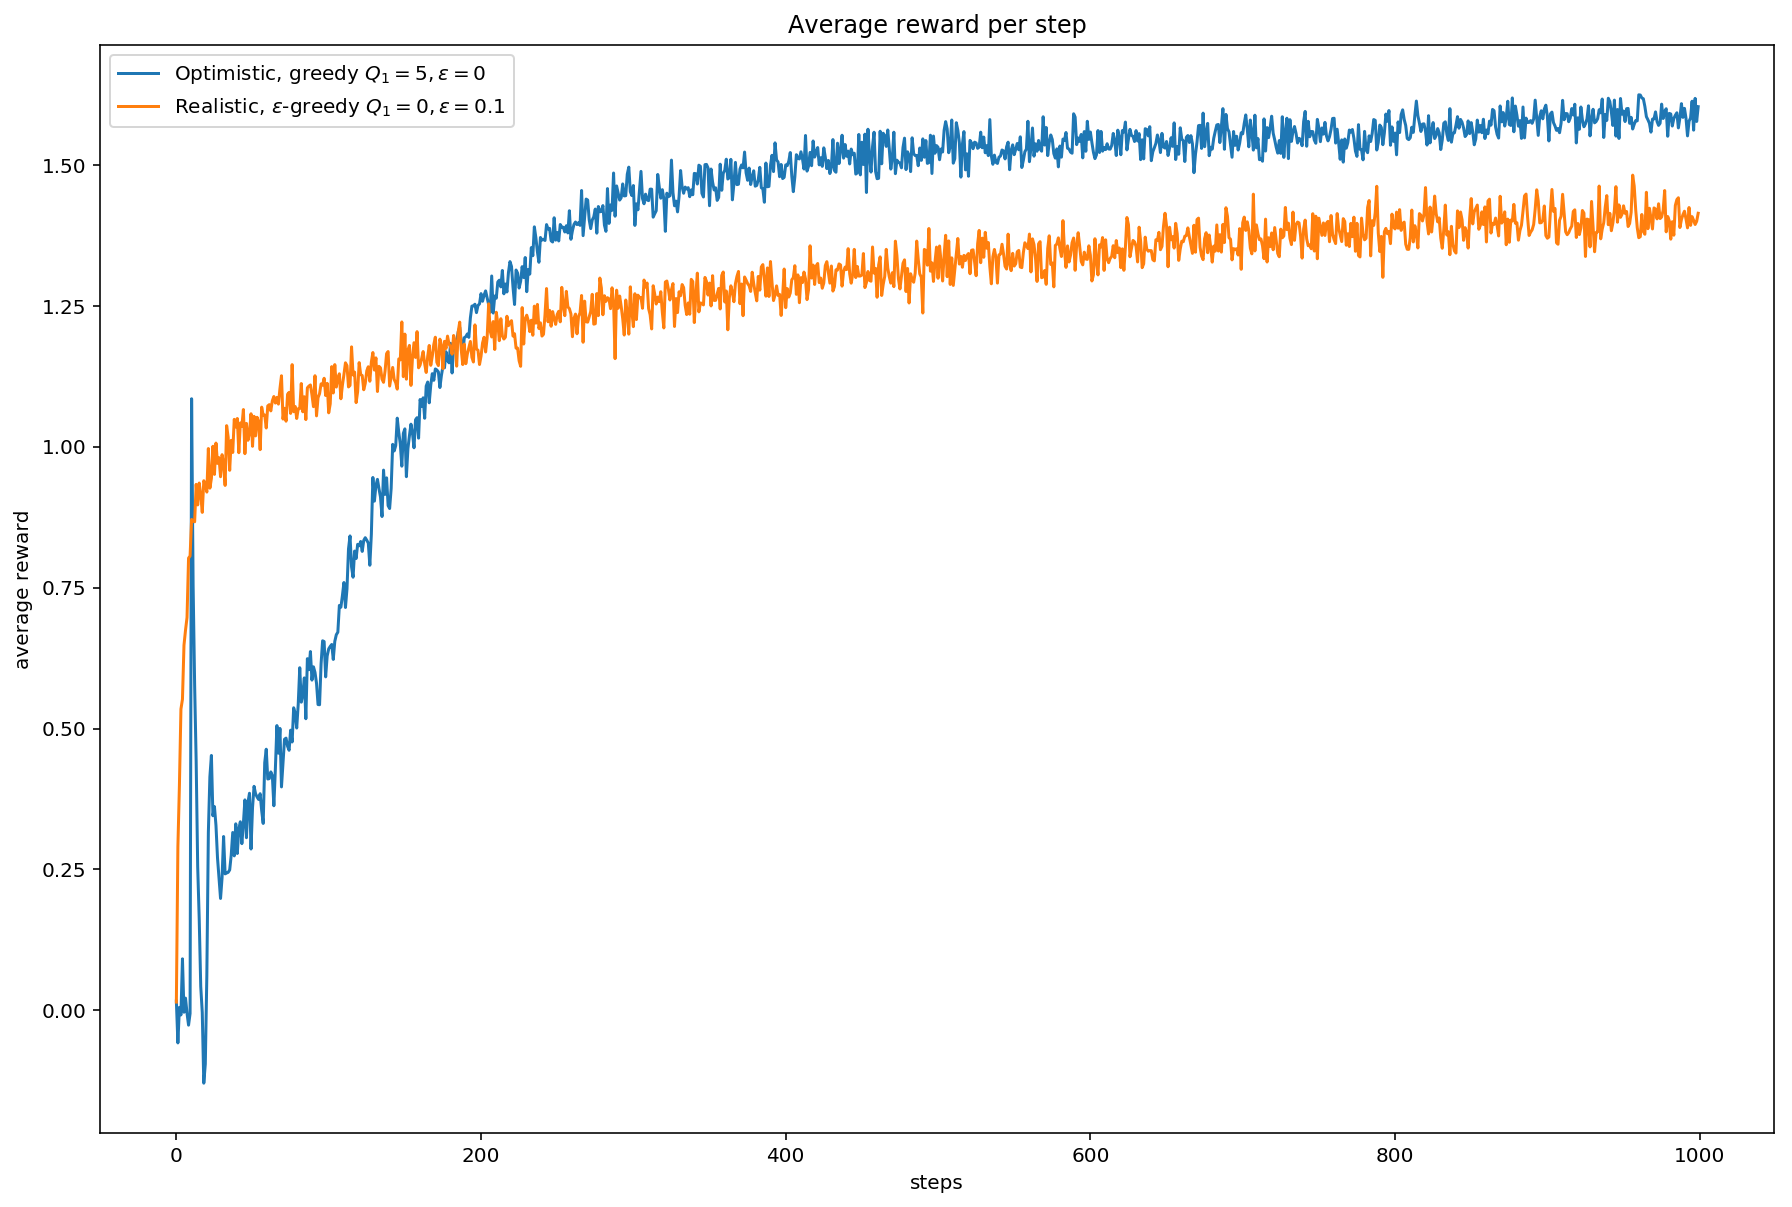

In [5]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(10)
ax.plot(R_Q5, label=r'Optimistic, greedy $Q_1 = 5, \varepsilon = 0$')
ax.plot(R_Q0, label=r'Realistic, $\varepsilon$-greedy $Q_1 = 0, \varepsilon = 0.1$')
plt.xlabel('steps')
plt.ylabel('average reward')
plt.title(r'Average reward per step')
plt.legend()
plt.show()

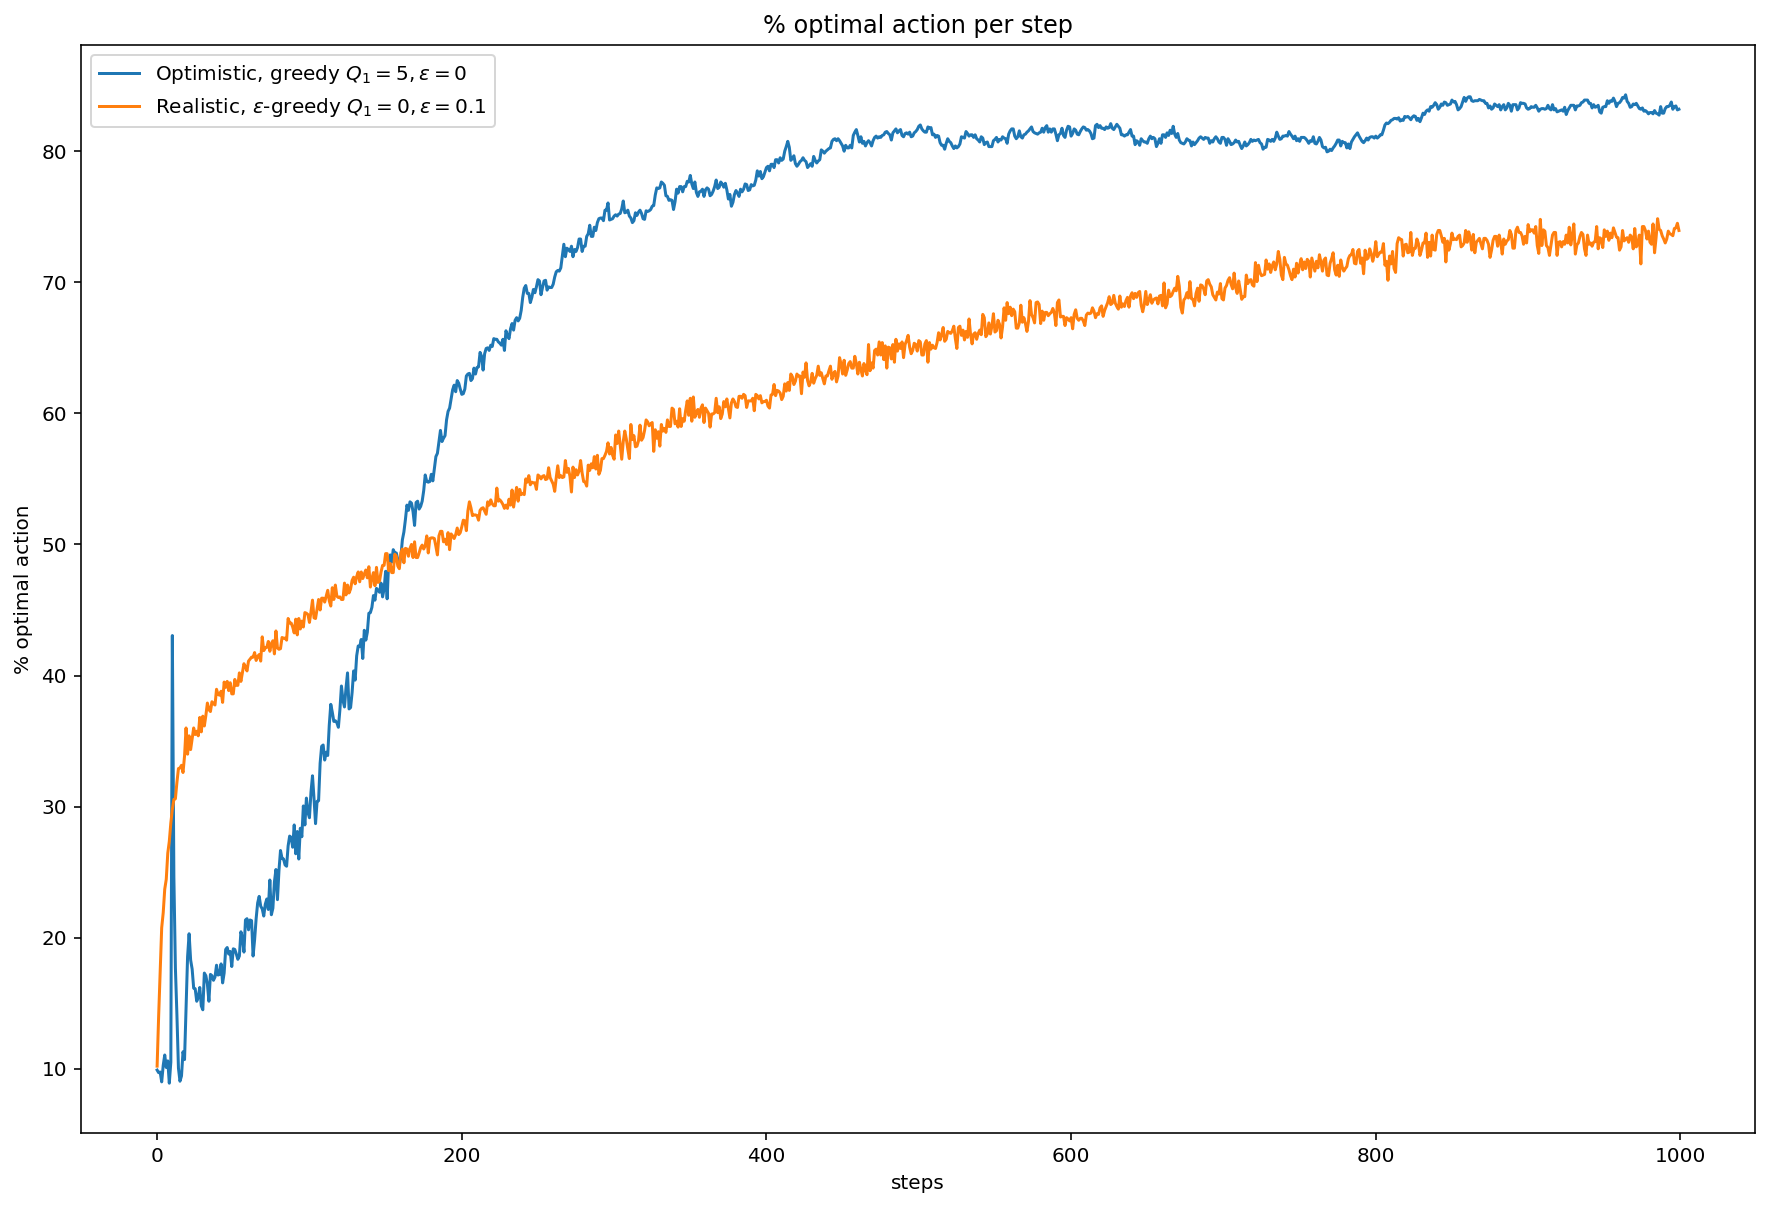

In [6]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(10)
ax.plot(O_Q5, label=r'Optimistic, greedy $Q_1 = 5, \varepsilon = 0$')
ax.plot(O_Q0, label=r'Realistic, $\varepsilon$-greedy $Q_1 = 0, \varepsilon = 0.1$')
plt.xlabel('steps')
plt.ylabel('% optimal action')
plt.title(r'% optimal action per step')
plt.legend()
plt.show()